In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

/Users/narushimatoshi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.DataFrame({
        "buy(y)":[True,True,True,True,True,True,True,False,False,False,False,False,False],
        "high":[4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
        "size":[30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
        "autolock":[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
    })

In [3]:
y = data.loc[:,["buy(y)"]]
X = data.loc[:,["high", "size","autolock"]]

In [6]:
y

,buy(y)
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,False
8,False
9,False


In [7]:
X

,high,size,autolock
0,4,30,1
1,5,45,0
2,3,32,1
3,1,20,1
4,6,35,1
5,3,40,1
6,4,38,1
7,1,20,0
8,2,18,0
9,1,20,0


In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

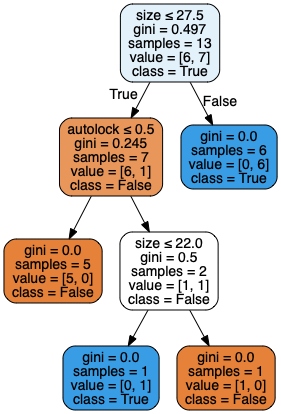

In [9]:
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"],#編集するのはここ  
                     class_names=["False","True"],#編集するのはここ（なぜFase,Trueの順番なのかは後程触れます）  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())